# Задание 1


1. Получите выборку с помощью следующего вызова:
```
make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Напишите метрику качества (`accuracy`), которая получается, если применить обученный `GridSearchCV` к тестовой выбоке.

In [22]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = make_moons(n_samples=1000, noise=0.5, random_state=10)
x_train, x_test, y_train, y_test = train_test_split(
    data[0], 
    data[1], 
    random_state=10, 
    test_size=0.5
)

grid_searcher = GridSearchCV(
    KNeighborsClassifier(),
    param_grid={
        'n_neighbors': range(1, 21),
        'p': [1, 2, 3],
    },
    cv=KFold(n_splits=5, random_state=10, shuffle=True)
)

grid_searcher.fit(x_train, y_train)
predicted = grid_searcher.predict(x_test)

f'accuracy = {accuracy_score(y_test, predicted)}'

'accuracy = 0.8'

# Задание 2


Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от одного до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра.

Код ниже строит изображения средней зависимости качества от количества соседей. Выберите картинку, которая у вас получилась.


In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def train_grid_search(X, y):
    grid_searcher = GridSearchCV(
        KNeighborsClassifier(),
        param_grid={
            'n_neighbors': range(1, 21),
        },
    )
    grid_searcher.fit(X, y)
    return grid_searcher.cv_results_['mean_test_score']

mean_test_scores = []
for i in range(1000):
  X, y = make_moons(n_samples=1000, noise=0.5)
  mean_test_score = train_grid_search(X, y)
  mean_test_scores.append(mean_test_score)

''

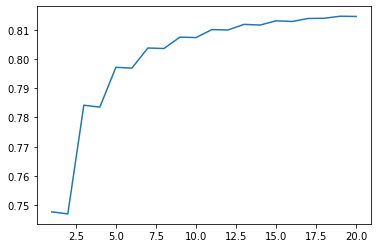

In [31]:
mean_test_scores = np.array(mean_test_scores)
plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))
;

# Задание 3

In [1]:
!pip install python-mnist
!mkdir dir_with_mnist_data_files
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!mv train-images-idx3-ubyte.gz dir_with_mnist_data_files
!mv train-labels-idx1-ubyte.gz dir_with_mnist_data_files

--2022-09-24 22:25:52--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9,5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9,45M  13,9MB/s    in 0,7s    

2022-09-24 22:25:53 (13,9 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2022-09-24 22:25:53--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[==========

In [ ]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np

mndata = MNIST('./dir_with_mnist_data_files', gz=True)
images, labels = mndata.load_training()
images, labels = np.array(images), np.array(labels)

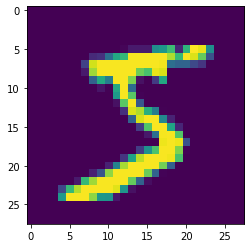

In [4]:
plt.imshow(images[0].reshape(28, 28));

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузит данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20. Какой accuracy вы получаете на тестовой выборке?

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    images,
    labels,
    test_size=0.2,
    train_size=0.8,
)

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)
f'accuracy = {accuracy}'

'accuracy = 0.9526666666666667'

# Задание 4

Найдите примеры, которые были классифицированы неправильно. Найдите и визуализируйте 5 соседей неправильных предсказаний у любого ошибочного примера. Найти соседей точки можно с помощью метода kneighbors.  Почему они были классифицированы неправильно?

actually: 8 predicted: 1


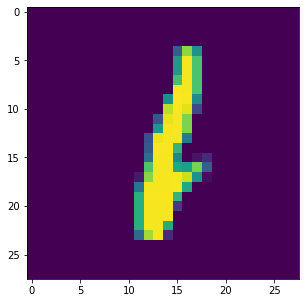

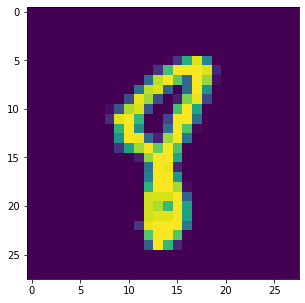

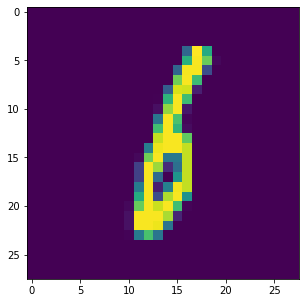

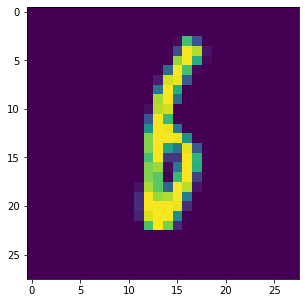

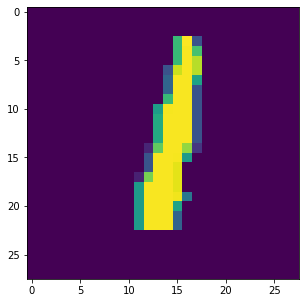

In [114]:
from matplotlib import pyplot as plt
import random

errors = []
for k, v in enumerate(y_predicted):
    if v != y_test[k]:
        errors.append((k, v))

random_error = errors[random.randint(0, len(errors))]

print(f'actually: {y_test[random_error[0]]} predicted: {random_error[1]}')

neighbors = knn.kneighbors(
    [X_test[random_error[0]]],
    n_neighbors=5,
    return_distance=False
)
for i in neighbors[0]:
    plt.figure(figsize=(5, 5))
    plt.imshow(X_train[i].reshape(28, 28));
    plt.show()